In [72]:
# read the file and store the lines in a list
with open(f"temp/Cora_label_scrub_gcn_1_hp_tuning_train_results.txt", "r") as file:
    lines = file.readlines()

lines

# parse the lines to get the values
accuracies = {}
for line in lines:
    epoch, accuracy = line.split(",")
    accuracies[int(epoch)] = float(accuracy)

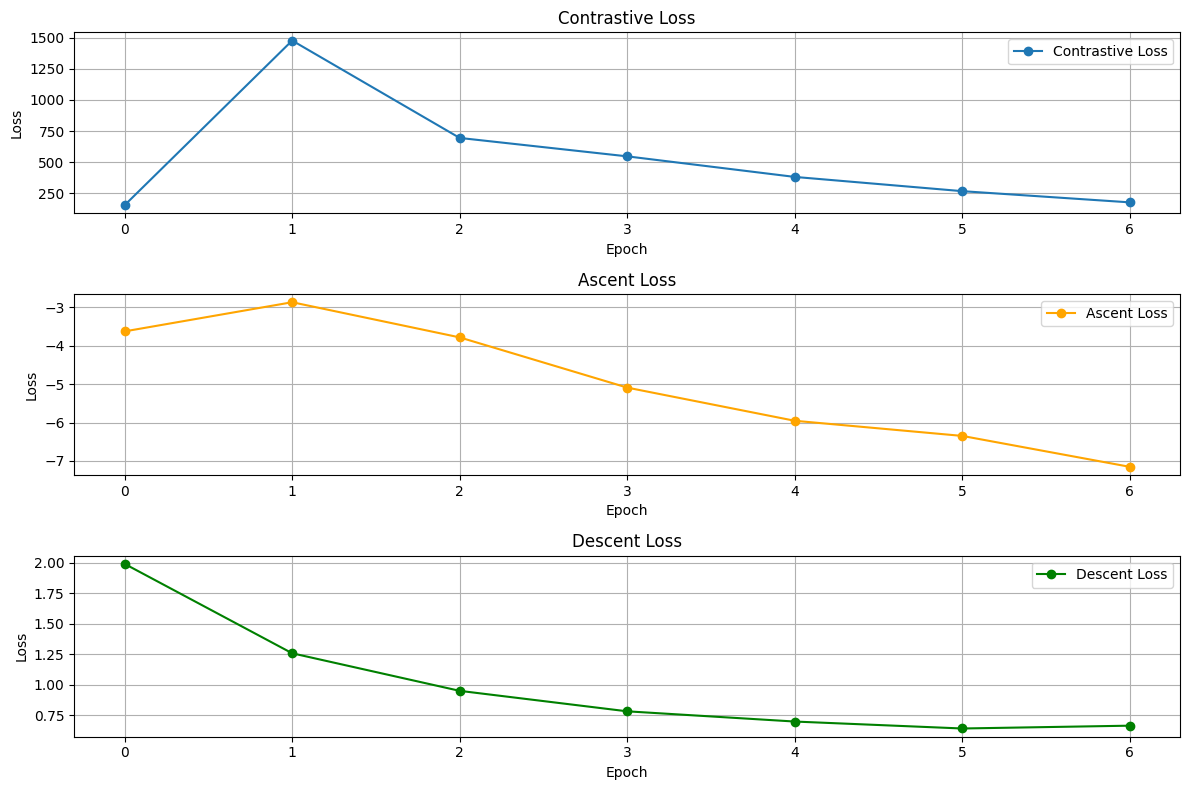

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_losses(file_path):
    # Load data from the file into a DataFrame
    data = pd.read_csv(file_path, header=None, names=["epoch", "step", "loss", "loss_type"])
    
    # Convert to appropriate types
    data["epoch"] = data["epoch"].astype(int)
    data["step"] = data["step"].astype(int)
    data["loss"] = data["loss"].astype(float)

    # Remove any trailing whitespace from loss_type
    data["loss_type"] = data["loss_type"].str.strip()

    # Separate losses by type
    contrastive_data = data[data["loss_type"] == "contrastive"]
    ascent_data = data[data["loss_type"] == "ascent"]
    descent_data = data[data["loss_type"] == "descent"]
    
    # Get the last step of each epoch
    contrastive_data = contrastive_data.groupby("epoch").last().reset_index()
    ascent_data = ascent_data.groupby("epoch").last().reset_index()
    descent_data = descent_data.groupby("epoch").last().reset_index()

    # Create the plot
    plt.figure(figsize=(12, 8))

    # Contrastive loss
    plt.subplot(3, 1, 1)
    plt.plot(contrastive_data["epoch"], contrastive_data["loss"], marker='o', label='Contrastive Loss')
    plt.title("Contrastive Loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.grid()
    plt.legend()

    # Ascent loss
    plt.subplot(3, 1, 2)
    plt.plot(ascent_data["epoch"], ascent_data["loss"], marker='o', color='orange', label='Ascent Loss')
    plt.title("Ascent Loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.grid()
    plt.legend()

    # Descent loss
    plt.subplot(3, 1, 3)
    plt.plot(descent_data["epoch"], descent_data["loss"], marker='o', color='green', label='Descent Loss')
    plt.title("Descent Loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.grid()
    plt.legend()

    # Adjust layout and show plot
    plt.tight_layout()
    plt.show()
    
    # save the data
    contrastive_data.to_csv("contrastive_data.csv", index=False)
    ascent_data.to_csv("ascent_data.csv", index=False)
    descent_data.to_csv("descent_data.csv", index=False)

# Use the function
plot_losses("losses.txt")


In [ ]:
# save the data to a csv file


In [73]:
accuracies

{0: 0.008776595744680852,
 10: 0.04414893617021277,
 20: 0.04414893617021277,
 30: 0.04920212765957447,
 40: 0.04414893617021277,
 50: 0.04414893617021277,
 60: 0.08856382978723404,
 70: 0.09627659574468085,
 80: 0.09069148936170213,
 90: 0.1377659574468085,
 100: 0.19228723404255318,
 110: 0.27047872340425533,
 120: 0.3428191489361702,
 130: 0.37101063829787234,
 140: 0.40132978723404256,
 150: 0.4308510638297872,
 160: 0.45398936170212767,
 170: 0.4734042553191489,
 180: 0.49175531914893617,
 190: 0.5103723404255319,
 200: 0.5321808510638298,
 210: 0.5438829787234043,
 220: 0.5585106382978723,
 230: 0.5659574468085107,
 240: 0.5768617021276595,
 250: 0.5803191489361702,
 260: 0.5856382978723405,
 270: 0.5944148936170213,
 280: 0.5962765957446808,
 290: 0.598404255319149,
 300: 0.6023936170212766,
 310: 0.6077127659574468,
 320: 0.6079787234042553,
 330: 0.613563829787234,
 340: 0.6172872340425531,
 350: 0.6202127659574468,
 360: 0.6252659574468085,
 370: 0.6273936170212766,
 380: 0.6

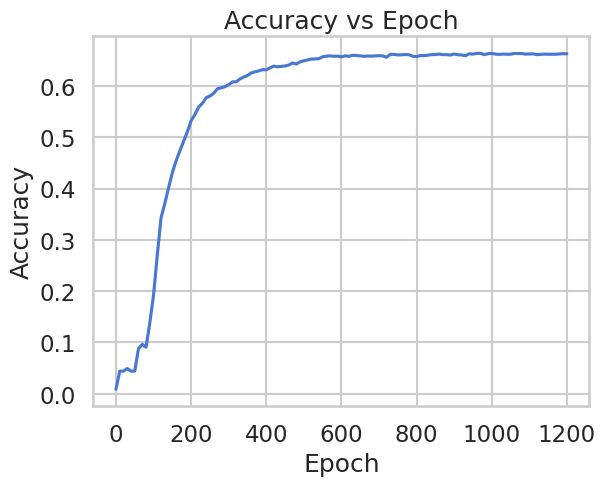

In [74]:
# plot the accuracies
import matplotlib.pyplot as plt

plt.plot(accuracies.keys(), accuracies.values())
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Epoch")
plt.show()

In [75]:
# get the epoch where accuracy is closest to 0.4, 0.5, 0.6

# get the epoch where accuracy is closest to 0.4
closest_to_03 = min(accuracies, key=lambda x: abs(accuracies[x] - 0.3))
closest_to_04 = min(accuracies, key=lambda x: abs(accuracies[x] - 0.4))
closest_to_05 = min(accuracies, key=lambda x: abs(accuracies[x] - 0.5))
closest_to_06 = min(accuracies, key=lambda x: abs(accuracies[x] - 0.6))

closest_to_03, closest_to_04, closest_to_05, closest_to_06

(110, 140, 180, 290)

In [76]:
# print the accuracies at these epochs and the last epoch
print(f"Accuracy at epoch {closest_to_03} is {accuracies[closest_to_03]}")
print(f"Accuracy at epoch {closest_to_04} is {accuracies[closest_to_04]}")
print(f"Accuracy at epoch {closest_to_05} is {accuracies[closest_to_05]}")
print(f"Accuracy at epoch {closest_to_06} is {accuracies[closest_to_06]}")
print(f"Accuracy at last epoch is {accuracies[max(accuracies.keys())]}")

Accuracy at epoch 110 is 0.27047872340425533
Accuracy at epoch 140 is 0.40132978723404256
Accuracy at epoch 180 is 0.49175531914893617
Accuracy at epoch 290 is 0.598404255319149
Accuracy at last epoch is 0.6625


0.7479035639412999 - 1207
0.7293850454227813 - 110
0.7479035639412999 - 140
0.757162823200559 - 180
0.7386443046820406 - 290

In [77]:
# load tensors from the file
import torch

# epoch_110_indices = torch.load("indices_110.pt")
# epoch_140_indices = torch.load("indices_140.pt")
# epoch_180_indices = torch.load("indices_180.pt")
# epoch_290_indices = torch.load("indices_290.pt")
# epoch_1200_indices = torch.load("indices_1207.pt")

# # convert all to numpy arrays
# epoch_110_indices = epoch_110_indices.cpu().numpy()
# epoch_140_indices = epoch_140_indices.cpu().numpy()
# epoch_180_indices = epoch_180_indices.cpu().numpy()
# epoch_290_indices = epoch_290_indices.cpu().numpy()
# epoch_1200_indices = epoch_1200_indices.cpu().numpy()

# load all files of the type indices_*.pt
import os
import re

indices_files = [file for file in os.listdir(".") if re.match(r"indices_\d+\.pt", file)]

indices_files

['indices_80.pt',
 'indices_95.pt',
 'indices_1060.pt',
 'indices_860.pt',
 'indices_180.pt',
 'indices_110.pt',
 'indices_290.pt',
 'indices_1150.pt',
 'indices_360.pt',
 'indices_140.pt',
 'indices_660.pt',
 'indices_1207.pt',
 'indices_50.pt']

In [78]:
# load all tensors
indices = {}
for file in indices_files:
    epoch = int(file.split("_")[1].split(".")[0])
    indices[epoch] = torch.load(file).cpu().numpy()
    
indices

{80: array([1545,  940, 1054,  899, 2466,  951, 1489, 1706, 2769, 2174, 1865,
         958, 2858,  939, 2838, 2691, 1976, 1102, 1468, 1693,  894, 1862,
        2855,  849, 1469,  901, 1311, 2766, 2063, 2593, 1369,  580, 2148,
        2169, 1682, 1863, 1314,  955, 1540, 2502,  902, 1116,  125, 1769,
        2556, 1973, 1373, 2340,  920,  617, 2481, 1119, 2591, 1937,  639,
         891,  645,  811, 2590,  824, 3103, 2638, 1715, 2051,  805,  999,
        1860, 2842, 2576,  665,  798,  662,  812, 2171, 2574,  658, 2166,
        3143, 2504, 2522, 2665, 2678,  638, 1101, 2541,  880, 2501, 1292,
        3098, 1508,  842, 1542, 1478, 1744, 2482, 1065,  813,  946,  777,
         628, 1707, 1375, 2872, 2245, 1616, 1786,  534, 2721, 1055,  641,
        1174,  797, 2181,  975, 1449,  760,  697, 2540,  646, 2801, 1490,
        1402, 1039, 2479, 2658,  757,  647, 1137, 1717,  549,  759, 2840,
        1474, 2832, 2167, 2864, 1910,  668,  484,  326, 2844,  593, 1494,
        1493, 2246,  803, 2796]),


In [79]:
# check if all indices are unique

for epoch, index in indices.items():
    if len(index) != len(set(index)):
        print(f"Indices at epoch {epoch} are not unique")

In [80]:
def get_closest_acc(epoch):
    # return the accuracy at the closest epoch to the given epoch
    closest_epoch = min(accuracies, key=lambda x: abs(x - epoch))

    return accuracies[closest_epoch]

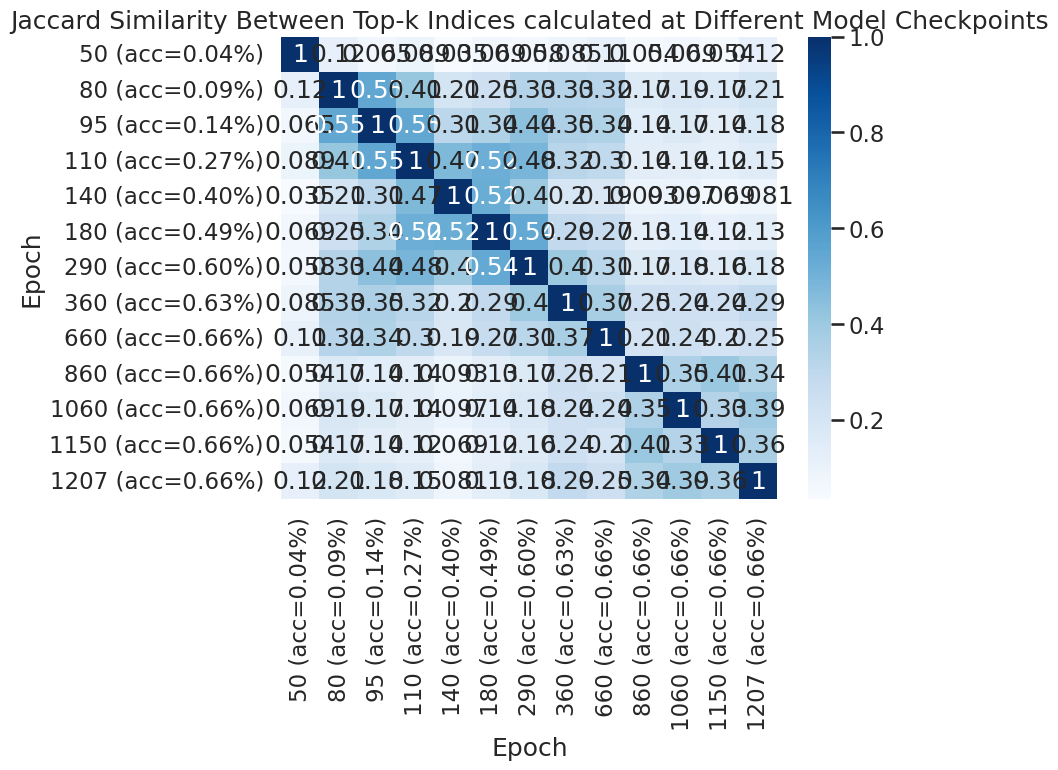

In [81]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def plot_overlap_fractions(arrays, labels=None, title="Jaccard Similarity Between Top-k Indices calculated at Different Model Checkpoints"):
    """
    Calculate and plot the fraction of overlap between pairs of numpy arrays.
    
    Parameters:
        arrays (list of np.ndarray): List of numpy arrays to compare.
        labels (list of str): Optional list of labels for the arrays. Default is None.
        title (str): Title for the heatmap plot. Default is "Fraction of Overlap Between Arrays".
    """
    n = len(arrays)
    overlap_matrix = np.zeros((n, n))

    # Calculate overlap fractions
    for i in range(n):
        for j in range(n):
            intersection = np.intersect1d(arrays[i], arrays[j])
            union = np.union1d(arrays[i], arrays[j])
            overlap_matrix[i, j] = len(intersection) / len(union)

    # Set labels if not provided
    if labels is None:
        labels = [f"Array {i+1}" for i in range(n)]

    # Plot the overlap as a heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(overlap_matrix, annot=True, cmap="Blues", xticklabels=labels, yticklabels=labels)
    plt.title(title)
    plt.xlabel("Epoch")

    plt.ylabel("Epoch")
    plt.show()

# sort the indices by the epoch
indices = dict(sorted(indices.items()))

arrays = list(indices.values())
epochs = list((indices.keys()))
acc_at_epochs = [get_closest_acc(epoch) for epoch in epochs]

# set the labels to be epoch (accuracy)
labels = [f"{epoch} (acc={acc:.2f}%)" for epoch, acc in zip(epochs, acc_at_epochs)]

# truncate the labels to 2 decimal places
# labels = [f"{label:.2f}" for label in labels]

plot_overlap_fractions(arrays, labels)


In [82]:
acc_str = '''51, 0.720125786163522, 0.5478880635410583
81, 0.7199510831586304, 0.5467642398106681
96, 0.720125786163522, 0.5495186879919315
111, 0.7293850454227813, 0.5429090011360325
141, 0.7479035639412999, 0.5369974469343256
181, 0.757162823200559, 0.5444729990409131
291, 0.7386443046820406, 0.543530596270064
361, 0.7479035639412999, 0.5438533475360176
661, 0.7199510831586304, 0.5452599894237323
861, 0.7386443046820406, 0.5259044872841693
1061, 0.7014325646401118, 0.5382905797470627
1151, 0.7199510831586304, 0.5408175824134162
1208, 0.7479035639412999, 0.5452246107399438
'''

# parse the lines to get the values
forg_accs = {}
for line in acc_str.split("\n"):
    if line:
        epoch, accuracy, loss = line.split(",")
        forg_accs[int(epoch)] = float(accuracy)
        
forg_accs

{51: 0.720125786163522,
 81: 0.7199510831586304,
 96: 0.720125786163522,
 111: 0.7293850454227813,
 141: 0.7479035639412999,
 181: 0.757162823200559,
 291: 0.7386443046820406,
 361: 0.7479035639412999,
 661: 0.7199510831586304,
 861: 0.7386443046820406,
 1061: 0.7014325646401118,
 1151: 0.7199510831586304,
 1208: 0.7479035639412999}

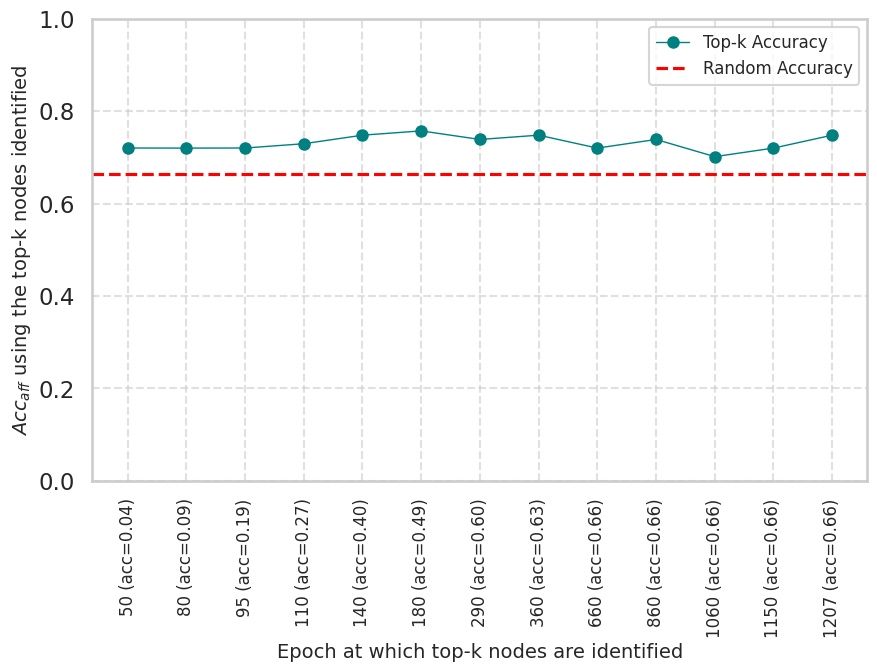

In [91]:
import matplotlib.pyplot as plt
import seaborn as sns

# beautify the plot
sns.set_style("whitegrid")
sns.set_context("talk")
sns.set_palette("muted")  # Choose a color palette

labels = [f"{epoch-1} (acc={get_closest_acc(epoch):.2f})" for epoch in forg_accs.keys()]

plt.figure(figsize=(10, 6))  # Adjust figure size
plt.plot(
    labels,
    forg_accs.values(),
    marker="o",
    linestyle="-",
    linewidth=1,
    markersize=8,
    label="Top-k Accuracy",
    color="teal",  # Choose a specific color if preferred
)
plt.xlabel("Epoch at which top-k nodes are identified", fontsize=14)
plt.ylabel("$Acc_{aff}$ using the top-k nodes identified", fontsize=14)
plt.ylim(0, 1)
plt.grid(True, linestyle="--", alpha=0.6)
plt.xticks(fontsize=12, rotation=90)

ramdon_acc = 0.6640461215932913

# add a horizontal line for the random accuracy
plt.axhline(y=ramdon_acc, color="r", linestyle="--", label="Random Accuracy")
plt.legend(fontsize=12)

plt.show()


ValueError: x and y must have same first dimension, but have shapes (12,) and (5,)

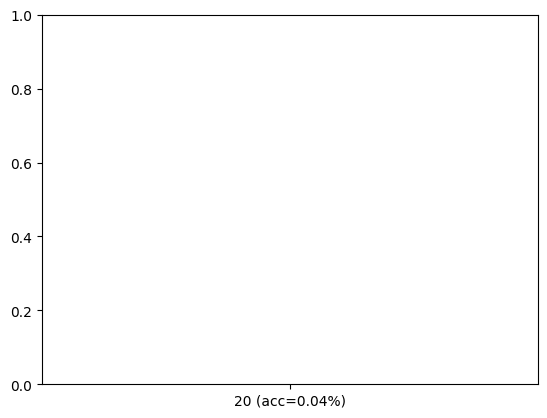

In [35]:
forget_accs = [0.7293850454227813, 0.7479035639412999, 0.757162823200559, 0.7386443046820406, 0.7479035639412999]

# plot the accuracies against the labels

plt.plot(labels, forget_accs, marker="o")
plt.ylim(0, 1)
plt.xlabel("Accuracy at which Forget Indices were calculated")
plt.ylabel("Forget Accuracy")

plt.title("Forget Accuracy vs Accuracy at which Top-K Indices were calculated")
plt.show()